<center>
<h1> Assignment in intro to neural computation</h1>
<h2> Part C&D </h2>
<h3> By : Michael trushkin </h3>
</center>


## Data
<b>
All data Is two dimensional ,  <x,y>   where    -1 <= x, y <= 1.  <br>
The data is all data points <x, y> where x is of the form m/100 where m is an integer between -100 and +100  <br>
and y is of the form  n/100 with n an integer between -100 and +100.

suppose that:
<x,y> has value of 1 iff :  <center>1/2 < x^2+y^2 < 3/4</center>

## About Part C
<b>
Try to traing a Neural network using back propogation, to predict the given function.<br>
show the output of each of the neuron's in the network.
</b>
### what we will do
* we will build out own neural network class, and implement back prop.


## About the neural network
* we will use mini-batch training, our model supports batches of any sizes.
* we use momentum model meaning the Gradient at time t, is combined with fraction of the gradient of time t-1
* the momentum level is set to 0.5 by default and the learning rate is 0.1 by default.

we use momentum because from some test's i have made it simply converges faster.

# Creating the data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import myGraphicFuncs
import NeuralNet
importlib.reload(myGraphicFuncs)
importlib.reload(NeuralNet)
from NeuralNet import NeuralNetwork
np.set_printoptions(suppress=True)
import myGraphicFuncs as mg

In [3]:
def f(x, y):
    d = x**2 + y**2
    if 0.5 <= d <= 0.75:
        return 1
    return 0

# def f(x,y):
#     if x>0.5 and y>0.5:
#         return 1
#     return 0

maxn = 100
maxm = 100

data_set1000 = mg.create_data(f, 1000, maxn, maxm)
data_negative, data_positive = mg.generate_data_all(f, maxn, maxm)
data_uniform1000 = mg.generate_uniform_dataset(f, 1000, data_positive, data_negative)
# data_uniform1000[np.random.choice(1000, 5)]
data_all = mg.generate_data_all_noseperation(f, maxn, maxm)

## difference between uniform data, and the real distribution

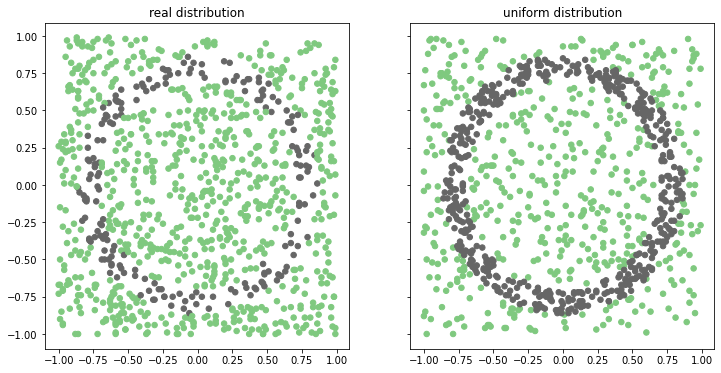

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,6))

mg.plot_data(data_set1000[:,:2], data_set1000[:,2:], axs[0])
mg.plot_data(data_uniform1000[:,:2], data_uniform1000[:,2:], axs[1])
axs[0].title.set_text("real distribution")
axs[1].title.set_text("uniform distribution")

<div class="page-break"></div>

## define neural network train and show results
* architecture we will use the \[2, 8, 3, 1\] architecture, as shown in one of the examples.
* note: the reason for 3 neurons in the layer 2, is due to noticing that this neuron doesnt predict anything ( from images ) 

## try predict few cases without training

### Our training function that will train the network on some data, in mini batches
* also save the network state at each iteration ( weights, biases )

In [7]:
def calculate_error(_net : NeuralNetwork, X, Y):
    prediction = _net.predict(X)
    err = np.square(prediction - Y).sum()
    return err

def train_net(_net : NeuralNetwork, _x, _y, iterations, batch_size, epsilone = 1, log = True):
    net_at_time_t = {}
    _size = _x.shape[0]
    indecies_t = np.random.choice(_size, 6)
    partition = int(_size / batch_size)

    errors = {}

    errors[0] = calculate_error(_net, _x, _y);
    inner_iters = 250

    best = _net
    best_err = errors[0]
    if log :
        print("error before training :", calculate_error(_net, _x, _y))
    for i in range(iterations):
        err = 0
        for k in range(inner_iters):
            permutation = np.random.permutation(_size)
            for j in range(partition):
                batch = permutation[batch_size * j : batch_size * (j + 1)]
                bx = _x[batch, :]
                by = _y[batch, :]
                r = _net.train(bx, by)
                # err += r
                # print(r)
        err =calculate_error(_net, _x, _y)
        if err < best_err:
            best_err = err
            best = _net.copy()
        errors[(i+1) * inner_iters] = err
        net_at_time_t[i] = _net.copy()
        if(log):
            #print("net error per 1000 data :",_net.err1000, "net alpha :", _net.alpha)
            print("epoch", (i + 1) * inner_iters, ", error :", err)
        if(err < epsilone):
            print("hit error below epsiline breaking out")
            break
    return best, net_at_time_t , errors
    # print(indecies_t)
    # print(_x[indecies_t, :])

<div class="page-break"></div>

In [8]:
x = data_uniform1000[:, :2]
y = data_uniform1000[:, 2:]

# # x = data_set1000[:, :2]
# # y = data_set1000[:, 2:]

net = NeuralNetwork([2, 8, 4, 1], learning_rate=0.1)
best_net, nets, errors  = train_net(net, x, y, 35, 64, 0.1, False)

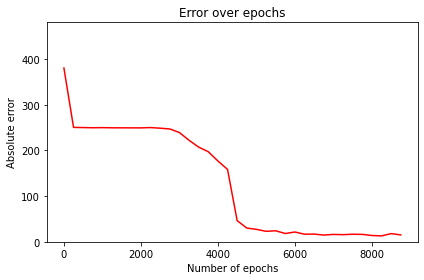

In [9]:
plt.plot(errors.keys(), errors.values(), c='r');
plt.title("Error over epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Absolute error")
plt.ylim(0, errors[0] + 100)
#plt.xlim(0, 6500)
plt.tight_layout()

<div class="page-break"></div>

## Ploting the networks prediction on the full data every 5th iteration
* <b> Note : the network trains on a closed training set with 1000 examples. <br>
  while we plot based on the 40k possible points <br>
  ( we skip over few to plot it nicely )
  </b>

In [10]:
#errors

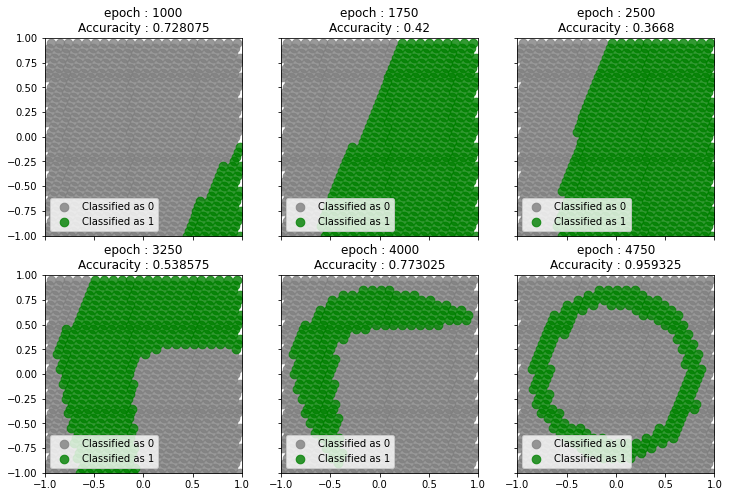

In [21]:
i = 1
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,8))

all_x = data_all[:, :2]
all_y = data_all[:, 2:]
# plot_test(axs[0][0], test_results[0])
for i in range(6):
    j = i % 3
    k = int(i / 3)
    iteration = i * 3 + 3
    accuracity = mg.calculate_accuracity(nets[iteration], all_x, all_y)
    name = "epoch : " + str((iteration + 1) * 250) + "\nAccuracity : " + str(accuracity) 
    mg.plot_test(nets[iteration], all_x[::45], name, axs[k][j], s=75)
plt.show()

## We can clearly see the model is "learning", and generalize well even to the "complete data"
* note that we plot the model predictions given data_points it has never seen before!

# The final result
## Lets showcase the final network result, as well as the output of everysingle neuron

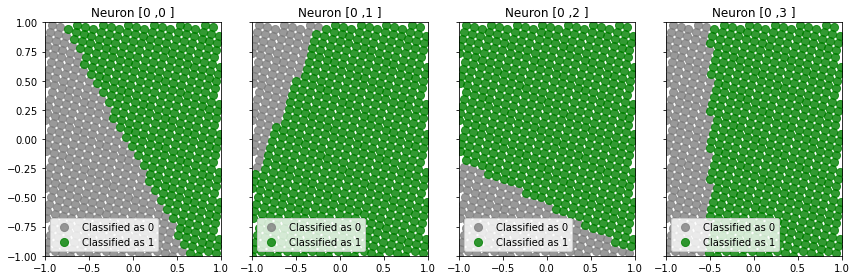

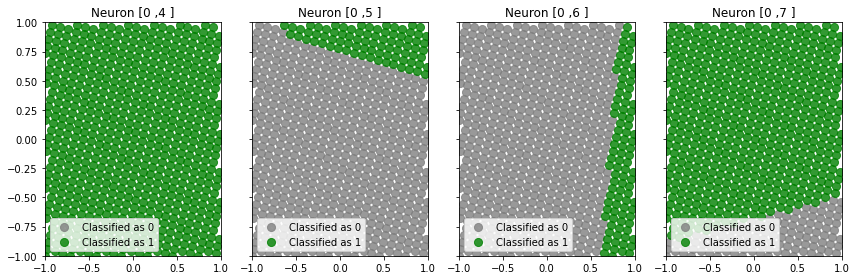

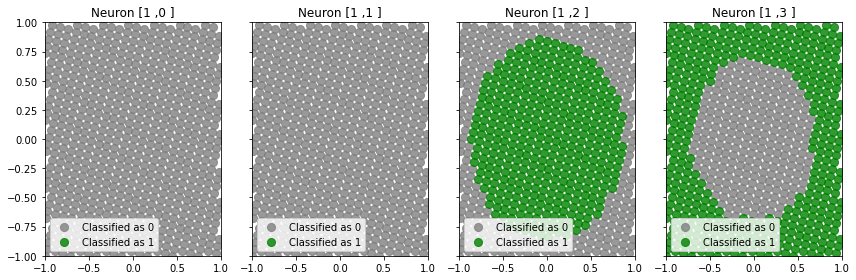

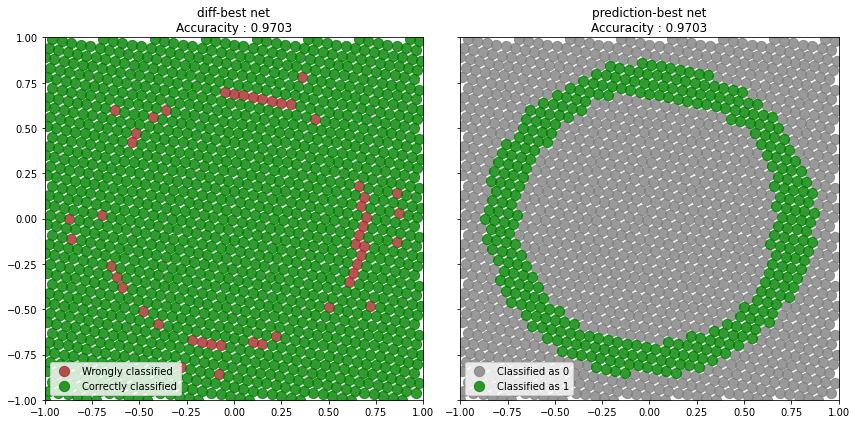

In [12]:
#best_net.predict(all_x[::23])

res = 27

px = all_x[::58]
pred = best_net.predict(px)

# t = np.array([0.5, 0.5])
# best_net.predict(t)
for j in range(best_net.num_layers - 1):
    items = best_net.layers[j + 1]

    fig, axs = plt.subplots(nrows=1, ncols= 4 , sharex=True, sharey=True, figsize=(12 ,4))
    #print(best_net.output[j+1])
    for i in range(items):
        index = i % 4
        if i == 4:
            plt.tight_layout()
            fig, axs = plt.subplots(nrows=1, ncols= 4 , sharex=True, sharey=True, figsize=(12 ,4))
        #print(best_net.output[j+1][i])
        #name = "epoch : " + str((iteration + 1) * 250) + "\nAccuracity : " + str(accuracity) 
        name = "Neuron [" + str(j) + " ," + str(i) + " ]" 
        mg.plot_test_inner(best_net.output[j+1][i], px, name, axs[index], s=65)
        #mg.plot_test(nets[iteration], px, name, axs[k][j], s=75)
    plt.tight_layout()
    plt.show()

# plot the Final neuron output ( actual prediction, also showcase the difference from the real data-set )
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,6))

netp = best_net
accuracity = mg.calculate_accuracity(netp, all_x, all_y)

name = "best net" +"\nAccuracity : " + str(accuracity)

mg.plot_diff(netp, all_x[::res], all_y[::res], "diff-"+name, axs[0], s=105)
mg.plot_test(netp, all_x[::res], "prediction-"+name, axs[1], s=105)
plt.tight_layout()
plt.show()

# Conclusion
<b>
We can see that the neural network has no problem in generalizing the data, <br>
and mostly predict correctly.

in the left figure, we can see in red in with point the network has predicted wrongly, <br>
and we clearly can see that those are some borders of the general circle.

i would say this is a great success.<br>

<div class="page-break"></div>

# Pard D
<b>
Now use the trained neurons from the next to last level of Part 3 as input and only an Adaline for the output.    <br>
(That is, you will give the adaline the output of the neurons from Part 3 in the level below the output,  and train only the Adaline.) <br>
Describe how accurate the Adaline can be.  Give diagrams.<br>

Draw whatever conclusions you think are appropriate from your results.
</b>

## my prediction
<b>
Adaline is the same thing as backprop, and thus would result in very similar results.
</b>

# Preparing the data.
### we will not prepare the data for adaline.<br> <b>
* first we will extract the inputs of the final layer.<br>
* out inputs would be from 0 to 1, as the neural net using sigmoid, <br>
  we would like, to use binary data for adaline, so we set eveything greater then 0.5 to be 1 otherwise -1. 

In [13]:
def extract_n_input(_net : NeuralNetwork, X):
    _net.predict(X)
    _nx = _net.output[best_net.num_layers - 1].T
    _nx[_nx > 0.5] = 1
    _nx[_nx <= 0.5] = -1

    return _nx
    

all_x = data_all[:, :2]
all_y = data_all[:, 2:]

train_nx = extract_n_input(best_net, x)
all_nx = extract_n_input(best_net, all_x)

## Conver the Output to be -1 and 1 ( as the output of the neuron )

In [14]:
yn = y.copy()
yn[yn <= 0.5] = -1

all_yn = all_y.copy()
all_yn[all_yn <= 0.5] = -1

## Create an adaline neuron with 4 inputs and train 100 epocs

In [15]:
from neuron import Neuron
import neuron
importlib.reload(neuron)

n = Neuron(4, 1, 0.01)

In [16]:
permutation = np.random.permutation(1000)
xnt = train_nx[permutation]
ynt = yn[permutation]

err = 0
for i in range(100):
    err += n.train_all(xnt, ynt).sum()
mg.calculate_accuracity(n, train_nx, yn)

0.984

## 98.4% Accuracity on the training set!
* note : that the data in the training set is 50% 50%


<AxesSubplot:title={'center':'Adaline neuron - training set'}>

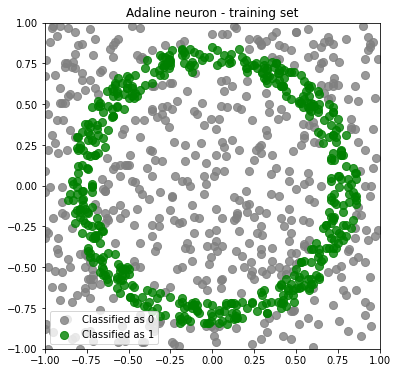

In [17]:
npred = n.predict(train_nx)
mg.plot_test_inner(npred, x, "Adaline neuron - training set", s=65)

<div class="page-break"></div>

## Plot the result on the test-data, as well as my conclusions

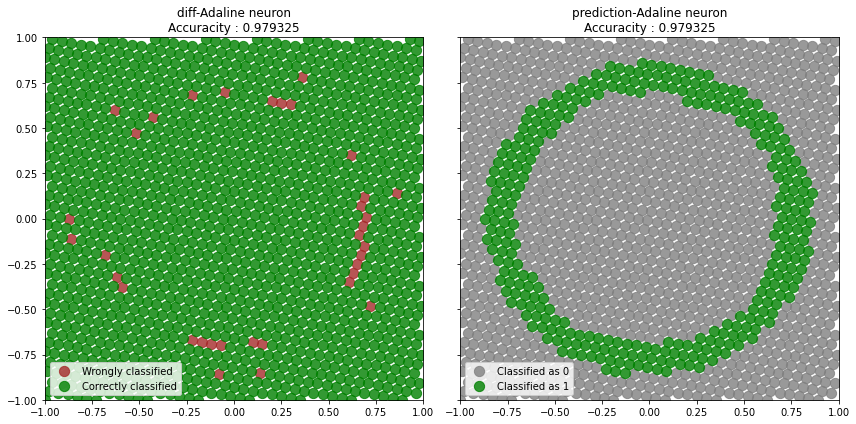

In [18]:
# plot the Final neuron output ( actual prediction, also showcase the difference from the real data-set )
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,6))
accuracity = mg.calculate_accuracity(n, all_nx, all_yn)

name = "Adaline neuron" +"\nAccuracity : " + str(accuracity)

res = 27
npred = n.predict(all_nx)[::res]

mg.plot_diff_inner(npred, all_x[::res], all_yn[::res], "diff-"+name, axs[0], s=105)
mg.plot_test_inner(npred, all_x[::res], "prediction-"+name, axs[1], s=105)
plt.tight_layout()
plt.show()

# Conclusion
<b>
as expected Adaline neuron connected to the pred final layer of a trained neural network with accuracity of 97.9%<br>
can achive the same accuracity!<br>

we got even higher accuracity then the acrual network, with can be explained by the fact that here we only changing the weights <br>
of the adaline neuron that way we can improve accuracity a little bit. <br>
as we minimizing the error based on the output of that same neural network, so we can expect,
about the same accuracity or even higher.

consider a neural network that has a final layer that is simply an identity function<br>
and the layer before that actually gives the final result<br>

if our neuron simply traines to by the identity function ( with it can )<br>
we would have the same output as the original neural network.

that is a neural network where the final layer is an Adaline neuron is the same thing!<br>
the only difference being how we train the model.

<div class="page-break"></div>

<center>
<h1> My Source code </h1>
<h5>  All code was written by me </h5>
</center>

In [ ]:
from numpy import ndarray
import numpy as np
import math

from numpy.lib.function_base import gradient


def sigmoid(x):
    try:
        return 1 / (1 + math.exp(-x))
    except:
        if x > 0:
            return 1
        return 0


def dSigmoid(x):
    return (1 - sigmoid(x))*sigmoid(x)

## Define sigmoid for np arrays
sigmoid_v = np.vectorize(sigmoid)
dsigmoid_v = np.vectorize(dSigmoid)

<center>
<h1> Neural network code </h1>
<h4> define sigmoid and its derivitive </h4>

</center>

## Intialize the class as well as a copy neural network function

In [ ]:
class NeuralNetwork:
    def __init__(self, layers: ndarray, learning_rate=0.2, momentum=0.5):
        """
        Layers : at index 0, expects the number of inputs ( excluding bias )
        other-layers : are the hidden layers and the number of neurons.
        Last-layer : number of outputs.

        Network implementing learning rate that is adjusting if the error is low!
        so we can put a high learning rate and when the net almost converged it will adjust it self to small jumps.

        """
        self.num_layers = len(layers) - 1
        self.layers = layers.copy()
        self.weights: dict(ndarray) = {}
        self.biases: dict(ndarray) = {}
        self.output = {}
        self.output_in = {}
        self.learning_rate = learning_rate
        self.trained = 1000
        self.err1000 = 1000
        self.alpha = 1
        self.momentum = momentum

        self.gradient = {}
        self.gradient_bias = {}
        for i in range(self.num_layers):
            self.gradient[i] = 0
            self.gradient_bias[i] = 0
            self.weights[i] = np.random.rand(layers[i], layers[i+1])
            self.biases[i] = np.random.rand(layers[i+1], 1)

    def copy(self):
        c = NeuralNetwork(self.layers, self.learning_rate, self.momentum)
        for i in range(self.num_layers):
            c.weights[i] = self.weights[i].copy()
            c.biases[i] = self.biases[i].copy()
        return c

## define the neural network Predict function

In [ ]:
    def predict(self, X: ndarray):
        """
        Given x ( row ) predict output

        Y(k) = sum i to n : w(i,k) * X(i)
        => Y = W.T @ X.T <=> (X @ W).T   

        X(i) = Y_out^-1(i) <= output of prev layer
        Y_out(k) = f(Y(k))
        """
        if(len(X.shape) == 1):
            X = X.reshape(1, -1)
        # print(X)
        X = X.T
        if X.shape[0] != self.layers[0]:
            print("wrong input size!!", self.layers[0], X.shape[1])
            return
        # pred = 0
        inputs = X.shape[1]
        binc = np.ones((1, inputs))
        self.output[0] = X  # the output of layer 0 ( input )
        # self.output_in[0] = X
        for i in range(self.num_layers):
            # Compute Y
            self.output_in[i + 1] = self.weights[i].T @ self.output[i] + \
                self.biases[i] @ binc
            # Compute Y_out
            self.output[i + 1] = sigmoid_v(self.output_in[i + 1])
        return self.output[self.num_layers].T


<div class="page-break"></div>


# Back propogation training algorithm

In [ ]:
 def train(self, X: ndarray, Y: ndarray):
        """
        Given some input X, and disired Y, train the network
        using Back Propogration
        """
        v = self.predict(X)
        if(v is None):
            print("Error in input X")
            return

        prediction = self.output[self.num_layers]

        if(len(Y.shape) == 1):
            Y = Y.reshape(1, -1)
        _size = Y.shape[0]
        Y = Y.T

        error = np.square(Y - prediction).sum()
        self.trained += _size

        p = _size / 1000
        self.err1000 = error + self.err1000 * (1 - p)
        self.alpha = 1
        if self.err1000 < 33:
            self.alpha = (self.err1000 / 100) ** 0.2 + 0.2
        self.alpha /= math.sqrt(_size)

        delta = {}
        delta[self.num_layers] = (Y - prediction) * \
            dsigmoid_v(self.output_in[self.num_layers])

        for i in range(self.num_layers - 1, 0, -1):
            # self.weights[i - 1] += self.learning_rate * delta[i + 1]
            delta[i] = self.weights[i] @ delta[i + 1]
            delta[i] = delta[i] * dsigmoid_v(self.output_in[i])

        binc = np.ones((1, _size))
        for i in range(self.num_layers):
            oldg = self.gradient[i]
            oldgb = self.gradient_bias[i]

            # calculate new gradient
            self.gradient[i] = (self.output[i] @ delta[i + 1].T)
            self.gradient_bias[i] = (delta[i + 1] @ binc.T)

            self.gradient[i] *= self.alpha * self.learning_rate
            self.gradient_bias[i] *= self.alpha * self.learning_rate

            # add old gradient as "momentum"
            self.gradient[i] += self.momentum * oldg
            self.gradient_bias[i] += self.momentum * oldgb

            # print(delta[i + 1], binc, gradient_bias)
            self.weights[i] += self.gradient[i]
            self.biases[i] += self.gradient_bias[i]

        return error / _size  # Error